# Lower Backpain Type(Normal / Abnormal) Prediction


Lower back pain can be caused by a variety of problems with any parts of the complex, interconnected network of spinal muscles, nerves, bones, discs or tendons in the lumbar spine. Typical sources of low back pain include:

1. The large nerve roots in the low back that go to the legs may be irritated
2. The smaller nerves that supply the low back may be irritated
3. The large paired lower back muscles (erector spinae) may be strained
4. The bones, ligaments or joints may be damaged
5. An intervertebral disc may be degenerating

An irritation or problem with any of these structures can cause lower back pain and/or pain that radiates or is referred to other parts of the body. Many lower back problems also cause back muscle spasms, which don't sound like much but can cause severe pain and disability.

While lower back pain is extremely common, the symptoms and severity of lower back pain vary greatly. A simple lower back muscle strain might be excruciating enough to necessitate an emergency room visit, while a degenerating disc might cause only mild, intermittent discomfort.

### Objective 
This dataset is about predicting a person is having abnormal or normal backpain using collected physical spine details/data.The dataset consists of 310 Observations, 13 Attributes (12 Numeric Predictors, 1 Binary Class Attribute - No Demographics)


In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
backpain=pd.read_csv("I:\\Great Lakes\\Supervised Learning Classification\\Inclass 1\\backpain.csv")
backpain.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


In [3]:
del backpain["Unnamed: 13"]

In [4]:
backpain.columns=['pelvic_incidence',
'pelvictilt',
'lumbar_lordosis_angle',
'sacral_slope',
'pelvic_radius',
'degree_spondylolisthesis',
'pelvic_slope',
'Direct_tilt',
'thoracic_slope',
'cervical_tilt',
'sacrum_angle',
'scoliosis_slope',
'Status'
]

In [5]:
backpain.head()

,pelvic_incidence,pelvictilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Status
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [6]:
backpain.shape

(310, 13)

In [7]:
backpain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
pelvic_incidence            310 non-null float64
pelvictilt                  310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
pelvic_slope                310 non-null float64
Direct_tilt                 310 non-null float64
thoracic_slope              310 non-null float64
cervical_tilt               310 non-null float64
sacrum_angle                310 non-null float64
scoliosis_slope             310 non-null float64
Status                      310 non-null object
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


In [8]:
backpain.isnull().sum()

pelvic_incidence            0
pelvictilt                  0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
pelvic_slope                0
Direct_tilt                 0
thoracic_slope              0
cervical_tilt               0
sacrum_angle                0
scoliosis_slope             0
Status                      0
dtype: int64

In [9]:
backpain.describe()

,pelvic_incidence,pelvictilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


In [10]:
backpain.corr()

,pelvic_incidence,pelvictilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743,0.043290,-0.078411,-0.089740,0.016750,0.019240,-0.007251
pelvictilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862,0.008852,-0.072119,-0.063394,0.028931,0.032859,-0.056550
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667,0.029486,-0.112939,-0.063582,0.063875,0.057199,-0.049054
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557,0.048988,-0.046914,-0.067968,-0.000063,0.000207,0.032853
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065,0.015767,0.063433,0.060477,-0.039800,0.029738,-0.030145
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000,0.085925,-0.063812,-0.057286,0.056576,0.023021,-0.041023
pelvic_slope,0.043290,0.008852,0.029486,0.048988,0.015767,0.085925,1.000000,0.012694,-0.011770,0.088017,0.060743,-0.073893
Direct_tilt,-0.078411,-0.072119,-0.112939,-0.046914,0.063433,-0.063812,0.012694,1.000000,0.009887,0.072738,-0.037428,-0.024021
thoracic_slope,-0.089740,-0.063394,-0.063582,-0.067968,0.060477,-0.057286,-0.011770,0.009887,1.000000,0.052451,0.011354,0.009541
cervical_tilt,0.016750,0.028931,0.063875,-0.000063,-0.039800,0.056576,0.088017,0.072738,0.052451,1.000000,0.057451,0.021243


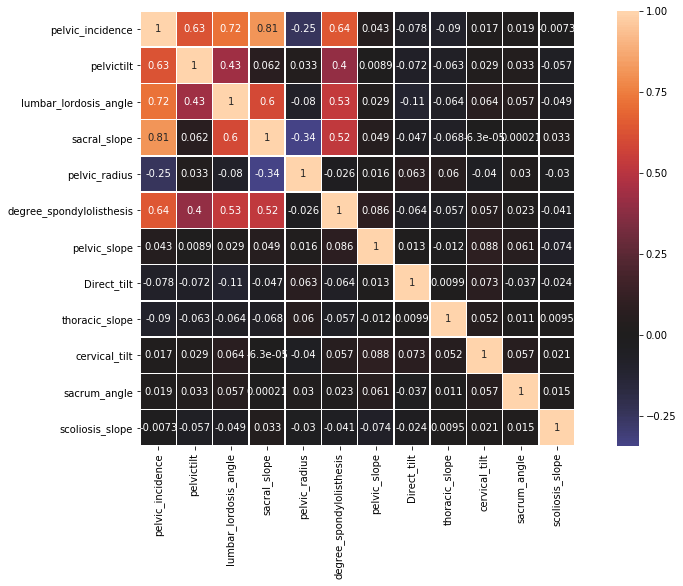

In [11]:
fig,ax=plt.subplots(figsize=(15,8))
sns.heatmap(backpain.corr(),center=0,square=True,linewidths=0.5,annot=True)
plt.show()

In [12]:
backpain["Status"].value_counts()

Abnormal    210
Normal      100
Name: Status, dtype: int64

In [13]:
#backpain["Status"]=backpain["Status"].apply(lambda  x: 0 if x=="Abnormal" else 1)
backpain["Status"]=backpain["Status"].replace({"Abnormal":0,"Normal":1})

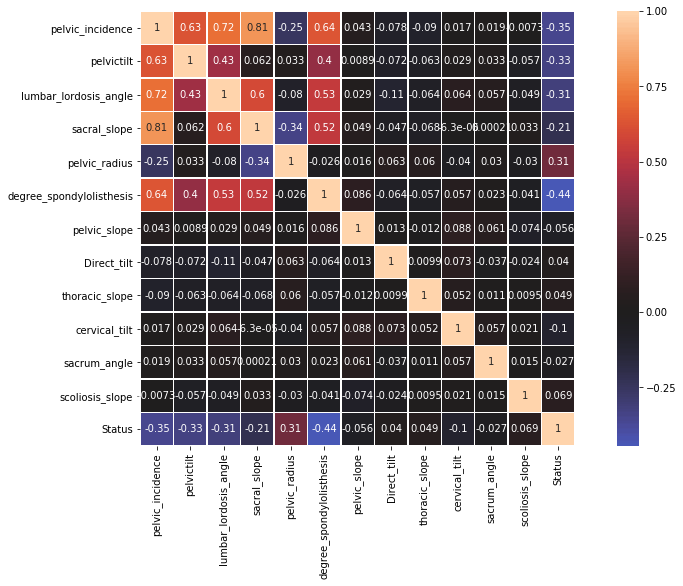

In [14]:
fig,ax=plt.subplots(figsize=(15,8))
sns.heatmap(backpain.corr(),center=0,square=True,linewidths=0.5,annot=True)
plt.show()

In [15]:
# Split
x=backpain.loc[:,backpain.columns!="Status"]
y=backpain.loc[:,backpain.columns=="Status"]

# Modelling and Feature Interpretation

def data_preprocess(x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y.values.ravel(),test_size=0.3,random_state=7)
    from sklearn.preprocessing import StandardScaler
    scalar=StandardScaler(copy=True,with_mean=True,with_std=True)
    
    scalar.fit(x_train)
    
    train_scaled=scalar.transform(x_train)
    test_scaled=scalar.transform(x_test)
    return(train_scaled,test_scaled,y_train,y_test)

def logistic_regression(x,y):
    logreg=LogisticRegression().fit(x,y)
    return(logreg)

In [16]:
# Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=sc.fit_transform(x)

In [17]:
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)
x_scaled.head()

,pelvic_incidence,pelvictilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
0,0.147086,0.501369,-0.665177,-0.184950,-1.447647,-0.708059,0.951630,-1.015066,0.434293,1.167129,-1.196587,1.712368
1,-1.245864,-0.748769,-1.453001,-1.041521,-0.264385,-0.579556,-0.202553,-0.977816,1.316291,1.679551,-0.940325,-0.913941
2,0.484370,0.467932,-0.099262,0.273083,-0.897686,-0.795421,0.006694,0.639127,1.302680,1.635969,-1.227178,-0.615686
3,0.511390,0.711562,-0.411339,0.126128,-1.207303,-0.402288,-0.363213,0.259554,-0.105211,-0.176157,-1.345020,-0.652989
4,-0.626648,-0.789693,-1.274745,-0.215876,-0.733455,-0.490106,0.246670,1.643094,0.851472,-1.059666,-0.190502,-0.069858


In [18]:
model=LogisticRegression()

In [19]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(model,x_scaled,y,cv=5,scoring='roc_auc')
np.mean(score),np.std(score,ddof=1)

(0.8902380952380952, 0.14930014360280636)

In [20]:
print("Roc_score for the model is",np.mean(score))

Roc_score for the model is 0.8902380952380952


In [21]:
print("Bias Error",1-np.mean(score))

Bias Error 0.10976190476190484


In [22]:
print("Variance Error",np.std(score,ddof=1))

Variance Error 0.14930014360280636


# Statistical test

In [23]:
backpain_corr=backpain.corr().iloc[:,-1].sort_values()

In [24]:
backpain_corr

degree_spondylolisthesis   -0.443687
pelvic_incidence           -0.353336
pelvictilt                 -0.326063
lumbar_lordosis_angle      -0.312484
sacral_slope               -0.210602
cervical_tilt              -0.100044
pelvic_slope               -0.055865
sacrum_angle               -0.026887
Direct_tilt                 0.039591
thoracic_slope              0.049354
scoliosis_slope             0.069315
pelvic_radius               0.309857
Status                      1.000000
Name: Status, dtype: float64

In [25]:
#sacrum_angle
sacrum_angle_0=backpain[backpain.Status==0]["sacrum_angle"]
sacrum_angle_1=backpain[backpain.Status==1]["sacrum_angle"]

In [26]:
stats.shapiro(backpain.sacrum_angle)

(0.9541999101638794, 2.911323271348465e-08)

In [27]:
stats.ttest_ind(sacrum_angle_1,sacrum_angle_0)

Ttest_indResult(statistic=-0.4720316241600851, pvalue=0.6372384603991009)

In [28]:
stats.mannwhitneyu(sacrum_angle_1,sacrum_angle_0)

MannwhitneyuResult(statistic=10144.0, pvalue=0.31494501214332915)

In [29]:
# We prove using statistical test that sacrum_angle is not significant variable

In [30]:
# pelvic_slope 
pelvic_slope_0=backpain[backpain.Status==0]["pelvic_slope"]
pelvic_slope_1=backpain[backpain.Status==1]["pelvic_slope"]

In [31]:
stats.shapiro(backpain.pelvic_slope)

(0.9556020498275757, 4.371993611584912e-08)

In [32]:
stats.ttest_ind(pelvic_slope_0,pelvic_slope_1)

Ttest_indResult(statistic=0.9819670700923712, pvalue=0.3268867802828531)

In [33]:
stats.mannwhitneyu(pelvic_slope_0,pelvic_slope_1)

MannwhitneyuResult(statistic=9782.0, pvalue=0.16538251759363887)

In [34]:
# We prove using statistical test that pelvic_slope is not significant variable

In [35]:
# cervical_tilt 
cervical_tilt_0=backpain[backpain.Status==0]["cervical_tilt"]
cervical_tilt_1=backpain[backpain.Status==1]["cervical_tilt"]

In [36]:
stats.shapiro(backpain.cervical_tilt)

(0.9535703063011169, 2.431290369031558e-08)

In [37]:
stats.ttest_ind(cervical_tilt_0,cervical_tilt_1)

Ttest_indResult(statistic=1.764623154222959, pvalue=0.07861821945250064)

In [38]:
stats.mannwhitneyu(cervical_tilt_0,cervical_tilt_1)

MannwhitneyuResult(statistic=9233.0, pvalue=0.043012820562378797)

In [39]:
# We can use cervical_tilt after log transformation 

In [40]:
# sacral_slope 
sacral_slope_0=backpain[backpain.Status==0]["sacral_slope"]
sacral_slope_1=backpain[backpain.Status==1]["sacral_slope"]

In [41]:
stats.shapiro(backpain.sacral_slope)

(0.9639798402786255, 5.886313942937704e-07)

In [42]:
stats.ttest_ind(sacral_slope_0,sacral_slope_1)

Ttest_indResult(statistic=3.7808470712114293, pvalue=0.00018769555657203096)

In [43]:
stats.mannwhitneyu(sacral_slope_0,sacral_slope_1)

MannwhitneyuResult(statistic=7653.5, pvalue=5.72111201560085e-05)

In [44]:
# We can use sacral_slope  after log transformation 

In [45]:
# lumbar_lordosis_angle
lumbar_lordosis_angle_0=backpain[backpain.Status==0]["lumbar_lordosis_angle"]
lumbar_lordosis_angle_1=backpain[backpain.Status==1]["lumbar_lordosis_angle"]

In [46]:
stats.shapiro(backpain.lumbar_lordosis_angle)

(0.9718118906021118, 9.219410458172206e-06)

In [47]:
stats.mannwhitneyu(lumbar_lordosis_angle_0,lumbar_lordosis_angle_1)

MannwhitneyuResult(statistic=6419.0, pvalue=1.5905143530371667e-08)

In [48]:
# We can use lumbar_lordosis_angle after log transformation 

In [49]:
# pelvictilt
pelvictilt_0=backpain[backpain.Status==0]["pelvictilt"]
pelvictilt_1=backpain[backpain.Status==1]["pelvictilt"]

In [50]:
stats.shapiro(backpain.pelvictilt)

(0.9663856625556946, 1.320634396506648e-06)

In [51]:
stats.mannwhitneyu(pelvictilt_0,pelvictilt_1)

MannwhitneyuResult(statistic=6320.0, pvalue=7.337148971768362e-09)

In [52]:
# We can use pelvictilt after log transformation 

In [53]:
#pelvic_incidence
pelvic_incidence_0=backpain[backpain.Status==0]["pelvic_incidence"]
pelvic_incidence_1=backpain[backpain.Status==1]["pelvic_incidence"]

In [54]:
stats.shapiro(backpain.pelvic_incidence)

(0.9711233973503113, 7.132715381885646e-06)

In [55]:
stats.mannwhitneyu(pelvic_incidence_0,pelvic_incidence_1)

MannwhitneyuResult(statistic=5820.0, pvalue=1.1260773170594985e-10)

In [56]:
# We can use pelvic_incidence after log transformation 

In [57]:
#degree_spondylolisthesis
degree_spondylolisthesis_0=backpain[backpain.Status==0]["degree_spondylolisthesis"]
degree_spondylolisthesis_1=backpain[backpain.Status==1]["degree_spondylolisthesis"]

In [58]:
stats.shapiro(backpain.degree_spondylolisthesis)

(0.6969759464263916, 2.9074345875246996e-23)

In [59]:
stats.mannwhitneyu(degree_spondylolisthesis_0,degree_spondylolisthesis_1)

MannwhitneyuResult(statistic=2805.0, pvalue=9.051557305412482e-26)

In [60]:
# We can use degree_spondylolisthesis after log transformation 

In [61]:
# Direct_tilt
Direct_tilt_0=backpain[backpain.Status==0]["Direct_tilt"]
Direct_tilt_1=backpain[backpain.Status==1]["Direct_tilt"]

In [62]:
stats.shapiro(backpain.Direct_tilt)

(0.9486250877380371, 6.197117041750744e-09)

In [63]:
stats.ttest_ind(Direct_tilt_0,Direct_tilt_1)

Ttest_indResult(statistic=-0.6953644010156558, pvalue=0.48735125777858523)

In [64]:
stats.mannwhitneyu(Direct_tilt_0,Direct_tilt_1)

MannwhitneyuResult(statistic=9974.0, pvalue=0.23813415203032984)

In [65]:
# We prove using statistical test that Direct_tilt is not significant variable

In [66]:
#thoracic_slope
thoracic_slope_0=backpain[backpain.Status==0]["thoracic_slope"]
thoracic_slope_1=backpain[backpain.Status==1]["thoracic_slope"]

In [67]:
stats.shapiro(backpain.thoracic_slope)

(0.9640489220619202, 6.022002025929396e-07)

In [68]:
stats.mannwhitneyu(thoracic_slope_0,thoracic_slope_1)

MannwhitneyuResult(statistic=9849.0, pvalue=0.18895457271334543)

In [69]:
# We prove using statistical test that thoracic_slope is not significant variable

In [70]:
#scoliosis_slope
scoliosis_slope_0=backpain[backpain.Status==0]["scoliosis_slope"]
scoliosis_slope_1=backpain[backpain.Status==1]["scoliosis_slope"]

In [71]:
stats.shapiro(backpain.scoliosis_slope)

(0.9595961570739746, 1.4530724001815543e-07)

In [72]:
stats.ttest_ind(scoliosis_slope_0,scoliosis_slope_1)

Ttest_indResult(statistic=-1.219413033468522, pvalue=0.22362046190353185)

In [73]:
stats.mannwhitneyu(scoliosis_slope_0,scoliosis_slope_1)

MannwhitneyuResult(statistic=9626.0, pvalue=0.1182000627337853)

In [74]:
# We prove using statistical test that scoliosis_slope is not significant variable

In [75]:
# pelvic_radius
pelvic_radius_0=backpain[backpain.Status==0]["pelvic_radius"]
pelvic_radius_1=backpain[backpain.Status==1]["pelvic_radius"]

In [76]:
stats.shapiro(backpain.pelvic_radius)

(0.9887223243713379, 0.0166160985827446)

In [77]:
stats.ttest_ind(pelvic_radius_0,pelvic_radius_1)

Ttest_indResult(statistic=-5.71945225076399, pvalue=2.5290220394265647e-08)

In [78]:
stats.mannwhitneyu(pelvic_radius_0,pelvic_radius_1)

MannwhitneyuResult(statistic=5850.0, pvalue=1.4652113319227072e-10)

In [79]:
# pelvic_radius is significant variable

# Model Building after droping insignificant variable

In [80]:
x_scaled1=x_scaled.drop(["sacrum_angle","pelvic_slope","Direct_tilt","thoracic_slope","scoliosis_slope"],axis=1)

In [81]:
model1=LogisticRegression()

In [82]:
score1=cross_val_score(model1,x_scaled1,y,cv=5,scoring='roc_auc')
np.mean(score1),np.std(score1,ddof=1)

(0.9035714285714287, 0.131734676313075)

In [83]:
print("Roc_Auc score for the model 1 is",np.mean(score1))

Roc_Auc score for the model 1 is 0.9035714285714287


In [84]:
print("Bias error for the model 1 is",1-np.mean(score1))

Bias error for the model 1 is 0.09642857142857131


# Model building after Log transformation

In [85]:
# cervical_tilt,sacral_slope,lumbar_lordosis_angle,degree_spondylolisthesis,pelvic_incidence,pelvictilt

In [86]:
 #log10(Y + 1 - min(Y)) for negative number log trasformation

In [87]:
x_new=x.drop(["sacrum_angle","pelvic_slope","Direct_tilt","thoracic_slope","scoliosis_slope"],axis=1)
x_new.head()

,pelvic_incidence,pelvictilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,cervical_tilt
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,15.30468
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,16.78486
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,16.65897
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,11.42447
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,8.87237


In [88]:
x_new.describe()

,pelvic_incidence,pelvictilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,cervical_tilt
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,11.933317
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,2.893265
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,7.030600
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,9.541140
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,11.953835
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,14.371810
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,16.821080


In [89]:
# Log Transformation
x_new["pelvictilt"]=x_new["pelvictilt"].apply(lambda x : np.log(x+1-x_new["pelvictilt"].min()))

In [90]:
x_new["degree_spondylolisthesis"]=x_new["degree_spondylolisthesis"].apply(lambda x : np.log(x+1-x_new["degree_spondylolisthesis"].min()))

In [91]:
for i in ["pelvic_incidence","lumbar_lordosis_angle","sacral_slope","pelvic_radius","cervical_tilt"]:
    x_new[i]= x_new[i].apply(lambda x:np.log(x))
          

In [92]:
x_new.head()

,pelvic_incidence,pelvictilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,cervical_tilt
0,4.143576,3.404775,3.679059,3.700690,4.591811,2.468420,2.728159
1,3.665021,2.868804,3.219491,3.367156,4.739749,2.810753,2.820477
2,4.231669,3.393616,3.913865,3.841891,4.663299,2.143339,2.812949
3,4.238402,3.472209,3.791238,3.798723,4.623683,3.147152,2.435758
4,3.906264,2.845318,3.343477,3.690398,4.683692,2.994566,2.182942


In [93]:
model2=LogisticRegression()

In [94]:
score2=cross_val_score(model2,x_new,y,cv=5,scoring='roc_auc')
np.mean(score2),np.std(score2,ddof=1)

(0.8745238095238095, 0.1789709815721475)

In [95]:
print("Roc_Auc score for the model 1 is",np.mean(score2))

Roc_Auc score for the model 1 is 0.8745238095238095


In [96]:
print("Bias error for the model 1 is",1-np.mean(score2))

Bias error for the model 1 is 0.12547619047619052


In [97]:
print("Variance error for the model 1 is",np.std(score2,ddof=1))

Variance error for the model 1 is 0.1789709815721475


# # Model building after Scaled Log transformation

In [98]:
sc=StandardScaler()
x_new_scaled=sc.fit_transform(x_new)

In [99]:
model3=LogisticRegression()

In [100]:
score3=cross_val_score(model3,x_new_scaled,y,cv=5,scoring='roc_auc')
np.mean(score3),np.std(score1,ddof=1)

(0.8926190476190475, 0.131734676313075)

In [101]:
print("Roc_Auc score for the model 1 is",np.mean(score3))

Roc_Auc score for the model 1 is 0.8926190476190475


In [102]:
print("Bias error for the model 1 is",1-np.mean(score3))

Bias error for the model 1 is 0.10738095238095247


In [103]:
print("Variance error for the model 1 is",np.std(score3,ddof=1))

Variance error for the model 1 is 0.13777518330159047


In [104]:
# The roc_auc score of the model after scaled log transformation is 0.89 and hence it is a good model for prediction.